# US Accidents Exploratory Data Analysis Project

In this Project, We are going to Explore the countrywide car accident dataset of the US. The accident data are collected from February 2016 to Dec 2020, there are about `3 million accident` records in this dataset. We are going to analyse the data to explore various questions like Hotspot locations of the Accidents, What time of the day is the frequency higher? and the impact of environmental stimuli on accident occurrence.


## 1. Import data and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [3]:
data = 'F:\\US_Accidents_Dec20_Updated.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


## 2. Data Preparation & Cleaning

Before We get to exploring the data, first and foremost we should prepare the data for the analysis. We'll first do data cleaning. we'll check for the null values and remove all the columns with a lot of null values. Also we'll imput appropriate values for the required columns for our analysis then We'll do memory optimzation since our data is too large.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Now let's see some statistics of the data with Panda's `.describe()` method.

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


We'll first see how many null values are there in the dataset. We'll drop the columns containing large number of null values since they won't be much useful. We'll also get rid of few of the columns which aren't too important.

In [8]:
df.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

So we can see there some columns which has quiet a lot of missing values.

Now we will see the percentage of the missing values per column.

In [5]:
missing_percent = df.isna().sum().sort_values(ascending=False)*100/len(df)
missing_percent

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Sunrise_Sunset            0.003784
Civil_Twilight            0.003784
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
City                      0.003716
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming     

<AxesSubplot:>

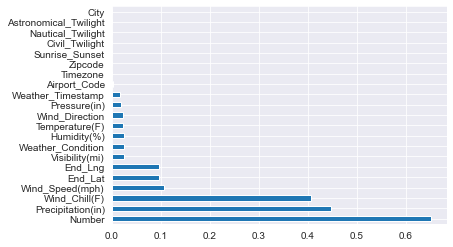

In [37]:
missing_percent[missing_percent != 0].plot(kind='barh')

In the plot we can see the maximum number of NA containing columns, we will get rid of those and some useless columns also.

In [12]:
df.drop(columns = ['Precipitation(in)', 'Wind_Speed(mph)', 'End_Lat', 
                   'End_Lng','Civil_Twilight', 'Nautical_Twilight', 
                   'Wind_Chill(F)', 'Astronomical_Twilight', 
                   'Wind_Direction', 'Pressure(in)', 'Weather_Timestamp', 
                   'Airport_Code', 'Timezone'], axis= 'columns', inplace=True)

In [13]:
df.drop('Number', axis='columns', inplace=True)

In [14]:
df.drop('Zipcode', axis='columns', inplace=True)

In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Country', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [16]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                   108
County                   0
State                    0
Country                  0
Temperature(F)       67224
Humidity(%)          71270
Visibility(mi)       72078
Weather_Condition    71851
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         110
dtype: int64

After droping the useless columns these are the columns which are important.

Now we will impute the missing values

In [17]:
# Filling NA values for the numeric columns
df['Temperature(F)'].fillna(df['Temperature(F)'].median(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].median(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].median(), inplace=True)

# Filling NA values for the categorical columns
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)
df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0], inplace=True)
df['City'].fillna(value = 'None', inplace = True)

In [18]:
df.isna().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Country              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

So as we can see all the missing value are filled now we can explore the dataset, create visualization and make decision

In [19]:
df.head(3).transpose()

,0,1,2
ID,A-1,A-2,A-3
Severity,2,2,2
Start_Time,2019-05-21 08:29:55,2019-10-07 17:43:09,2020-12-13 21:53:00
End_Time,2019-05-21 09:29:40,2019-10-07 19:42:50,2020-12-13 22:44:00
Start_Lat,34.808868,35.09008,37.14573
Start_Lng,-82.269157,-80.74556,-121.985052
Distance(mi),0.0,0.0,1.4
Description,Accident on Tanner Rd at Pennbrooke Ln.,Accident on Houston Branch Rd at Providence Br...,Stationary traffic on CA-17 from Summit Rd (CA...
Street,Tanner Rd,Providence Branch Ln,Santa Cruz Hwy
Side,R,R,R


In [20]:
convert_columns = ['Start_Time', 'End_Time']
df[convert_columns] = df[convert_columns].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   Distance(mi)       float64       
 7   Description        object        
 8   Street             object        
 9   Side               object        
 10  City               object        
 11  County             object        
 12  State              object        
 13  Country            object        
 14  Temperature(F)     float64       
 15  Humidity(%)        float64       
 16  Visibility(mi)     float64       
 17  Weather_Condition  object        
 18  Amenity            bool          
 19  Bump               bool          
 20  Crossing           bool 

Here we converted the datatype of `Start_Time`, `End_Time` from `object` to `datetime`

## Exploratory analysis and Visualization

In this, We'll analyse each column of our dataset excluding some which don't impact or have any meaningful insights whatsoever. There are many columns worth exploring like `State`, `City`, `Street`, `County`, `Start_Time`, `Temperature(F)`, `Weather_Condition`, `Visibility(mi)`. We'll gain many insights and will try to answer a lot of questions about the dataset.

### A. City

In [21]:
cities = df.City.unique()
cities

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [22]:
len(cities)

11790

In [23]:
cities = df["City"].value_counts(ascending = False).reset_index()
cities.columns = ["City", "Number_of_Accidents"]
cities["% of_Accidents"] =(cities["Number_of_Accidents"]*100)/len(df)
cities.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
cities_accidents = cities.head(50)
cities_accidents.head()

,City,Number_of_Accidents,% of_Accidents
0,Los Angeles,68411,2.353635
1,Houston,68265,2.348612
2,Charlotte,56176,1.932698
3,Miami,49965,1.719013
4,Dallas,48525,1.669471


<AxesSubplot:title={'center':'Accident by Cities (Top 50)'}, xlabel='Number_of_Accidents', ylabel='City'>

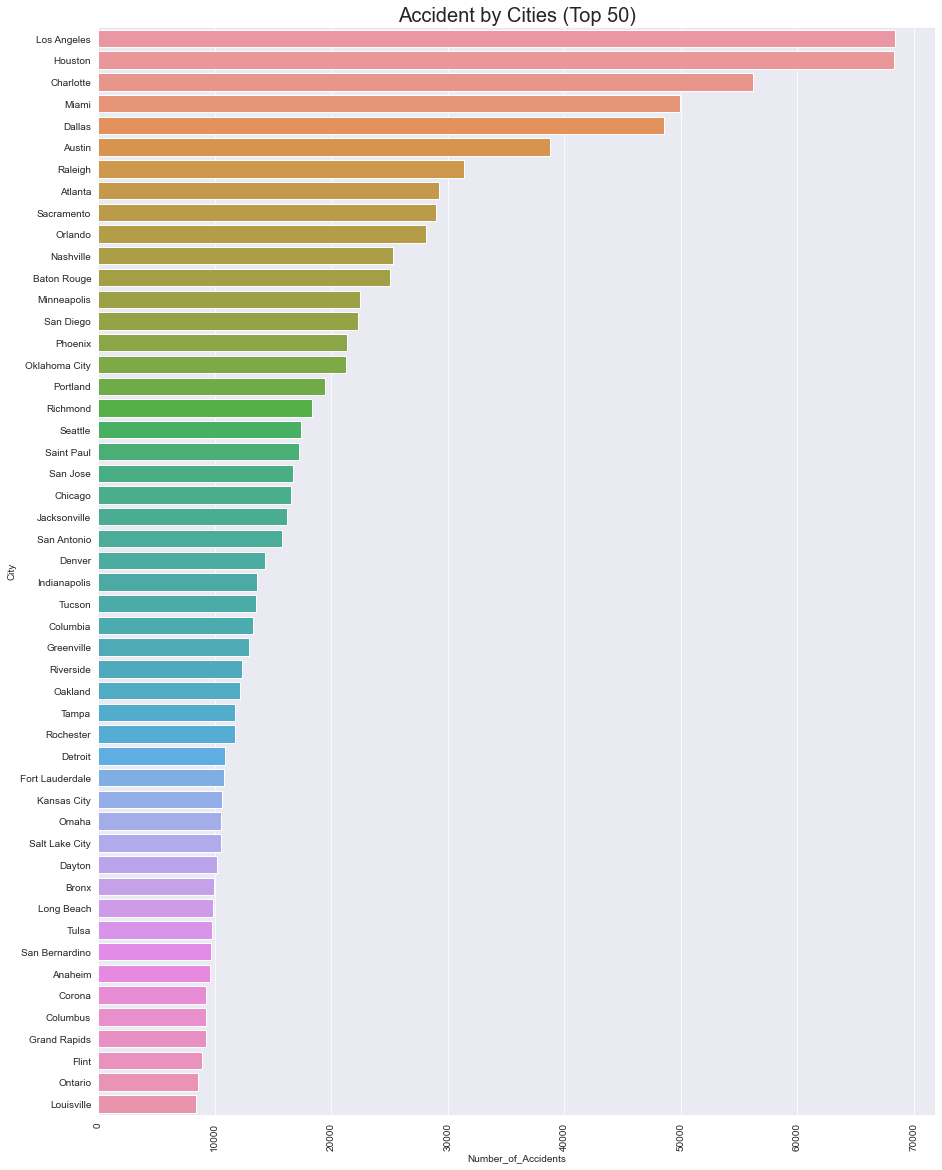

In [38]:
plt.figure(figsize=(15,20))
plt.xticks(rotation = 90)
plt.title("Accident by Cities (Top 50)",fontsize= 20)
sns.barplot(y = "City", x = "Number_of_Accidents", data = cities_accidents )

In [25]:
cities["% of_Accidents"].head(1000).sum()

80.89471927778408

In [26]:
cities["% of_Accidents"].head(100).sum()

44.266310237699585

In [27]:
cities["% of_Accidents"].head(10).sum()

15.407123762733907

We have 11790 cities. Of that `Top 1000 cities` account for `80%` of the Accidents, `Top 100 cities` account for `44%` of the Accidents and `Top 10 cities` account for `15%` of the Accidents.

### B. Start_Time

In [28]:
df.Start_Time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

In [29]:
df["Year"] = df["Start_Time"].dt.year

Text(0.5, 1.0, 'Yearly Accidents Trend')

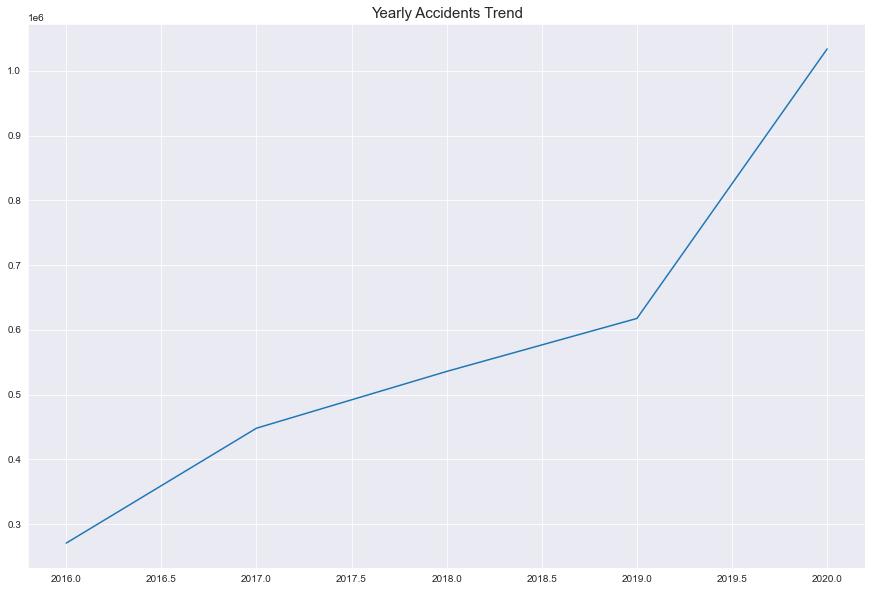

In [39]:
plt.figure(figsize = (15,10))
df["Start_Time"].dt.year.value_counts().plot(kind = "line")
plt.title("Yearly Accidents Trend", fontsize = 15)

Text(0.5, 1.0, 'Percentage of yearly Accidents')

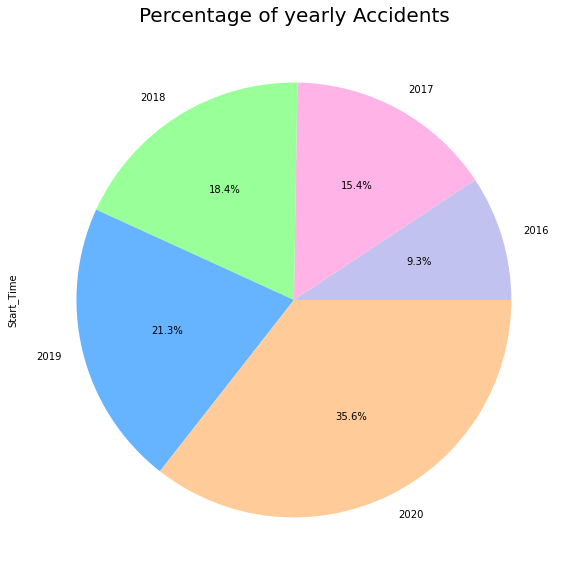

In [31]:
plt.figure(figsize = (25,10))
colors = ['#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff', '#ffcc99']
(df["Start_Time"].dt.year.value_counts(ascending = True)*100/len(df)).plot(kind = "pie", autopct = "%1.1f%%", colors = colors)
plt.title("Percentage of yearly Accidents", fontsize = 20)

#### Out of all the accident records `35.6%` of accidents have happened in 2020. Accidents are increasing at an alarming rate every year.

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

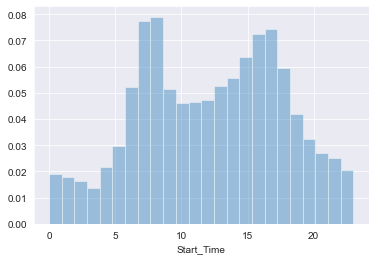

In [40]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.

<AxesSubplot:xlabel='Start_Time'>

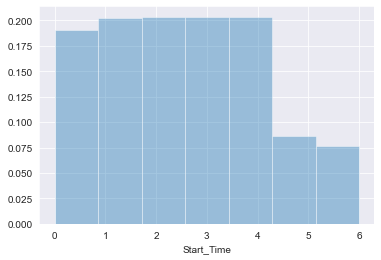

In [41]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

This is the distribution of accidents by hour the same on weekends as on weekdays.

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

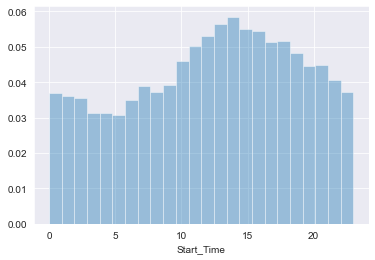

In [42]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

- On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

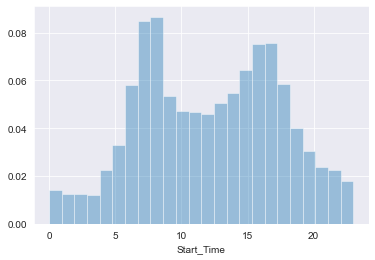

In [43]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

- On weekdays again the time duration is between `6am to 5pm`

Let's see the month wise data

In [44]:
df["Month"] = df["Start_Time"].dt.month_name()

Text(0.5, 1.0, 'Percentage of Monthly Accidents')

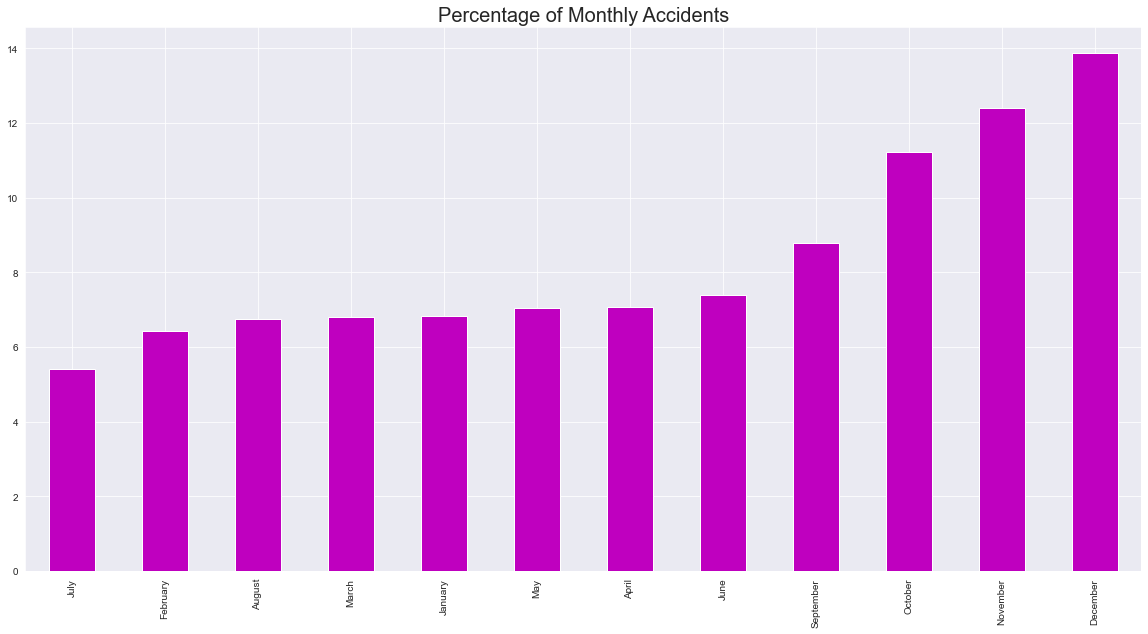

In [45]:
plt.figure(figsize = (20,10))
(df["Start_Time"].dt.month_name().value_counts(ascending = True)*100/len(df)).plot(kind = "bar", color = "m")
plt.title("Percentage of Monthly Accidents", fontsize = 20)

- As we can see in the month of `December` we have the highest number of accidents and `July` has the least number of accidents.

### C. Severity

Text(0.5, 1.0, 'Percentage of Severity of Accidents')

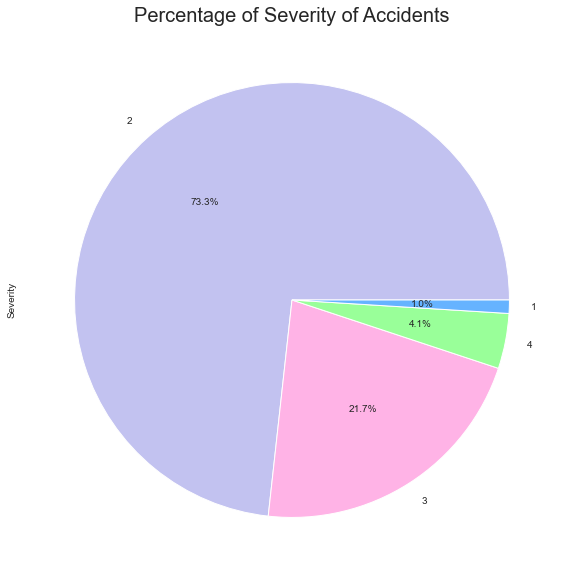

In [46]:
plt.figure(figsize = (25,10))
df["Severity"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", colors = ('#c2c2f0','#ffb3e6', '#99ff99', '#66b3ff' ))
plt.title("Percentage of Severity of Accidents", fontsize = 20)

- 73% reported accidents have Severity 2 which could mean that there are a lot of accidents which caused some injuries and had little impact.

<AxesSubplot:xlabel='Severity', ylabel='count'>

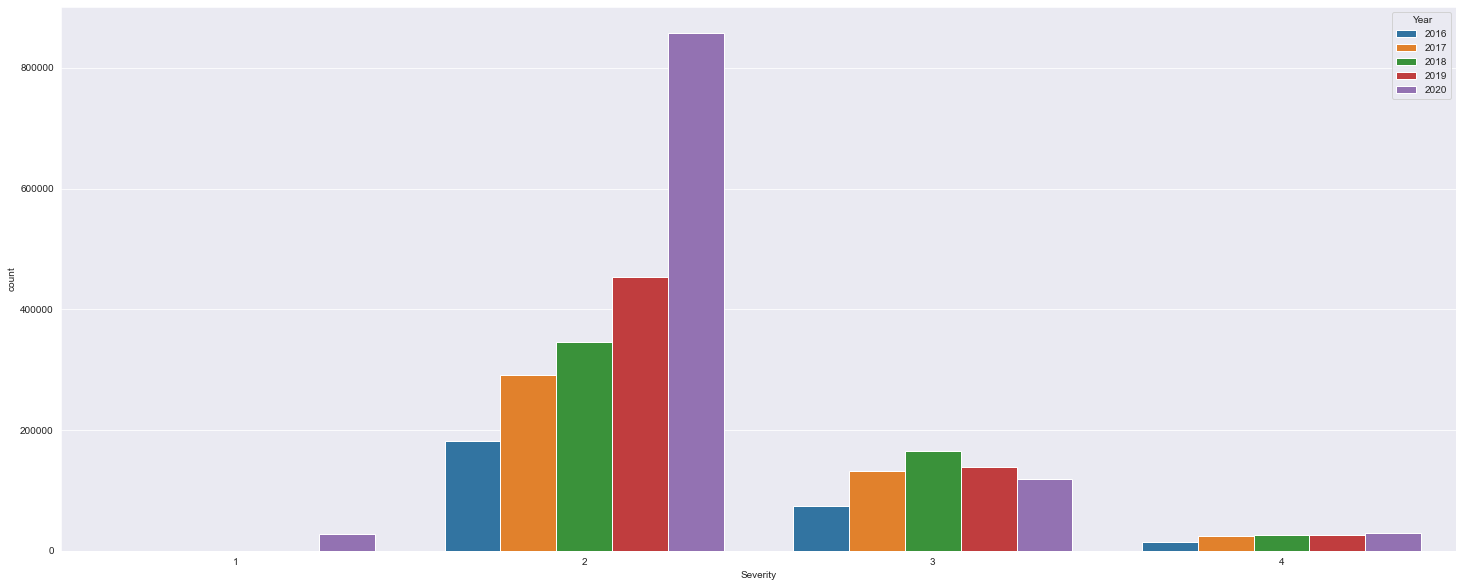

In [47]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Severity", hue = "Year", data = df)

- It seems there are little to no records of Severity 1. Year 2020 had the most number of Severity 2 Accidents though it doesn't seem to be the case in Severity 3 and 4 which is an interesting find.

### D. Weather_Condition

In [5]:
weather = df["Weather_Condition"].value_counts().reset_index()
weather.columns = ["Weather", "Number_of_Accidents"]
weather["% of_Accidents"] =(weather["Number_of_Accidents"]*100)/len(df)
weather.sort_values(by = "Number_of_Accidents",ascending = False, inplace = True)
weather_condition = weather.head(10)
weather_condition.head()

,Weather,Number_of_Accidents,% of_Accidents
0,Fair,692680,23.831199
1,Clear,498925,17.165186
2,Mostly Cloudy,386122,13.284273
3,Partly Cloudy,268851,9.249641
4,Cloudy,245054,8.430921


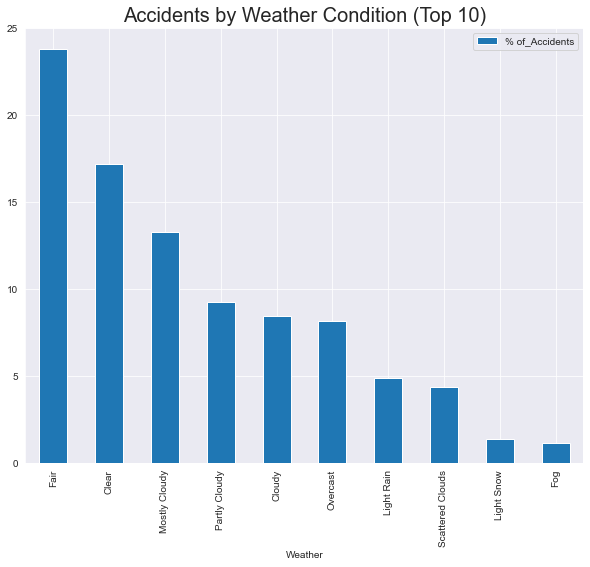

In [8]:
plt.rcParams["figure.figsize"] = (10,8)
weather_condition.plot(x = "Weather", y = "% of_Accidents", kind = "bar")
plt.title("Accidents by Weather Condition (Top 10)", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [50]:
weather_condition["% of_Accidents"].head(6).sum()

82.58937387540813

- "Fair" weather condition has the large number of accidents i.e 26% of the accidents. Clear and Mostly Cloudy also have 17% and 13% respectively. Also for Partly Cloudy has 9%, Cloudy has 8%, Overcast has 8% accidents. These top 6 Weather conditions amounts to `82.6%` of total accidents.

In [10]:
group = df.groupby(["Weather_Condition", "Severity"])["Severity"].count().sort_values(ascending = False).unstack("Weather_Condition")

In [11]:
weather_severity = group[["Fair","Clear", "Mostly Cloudy", "Partly Cloudy", "Cloudy", "Overcast"]].unstack()

Text(0, 0.5, '')

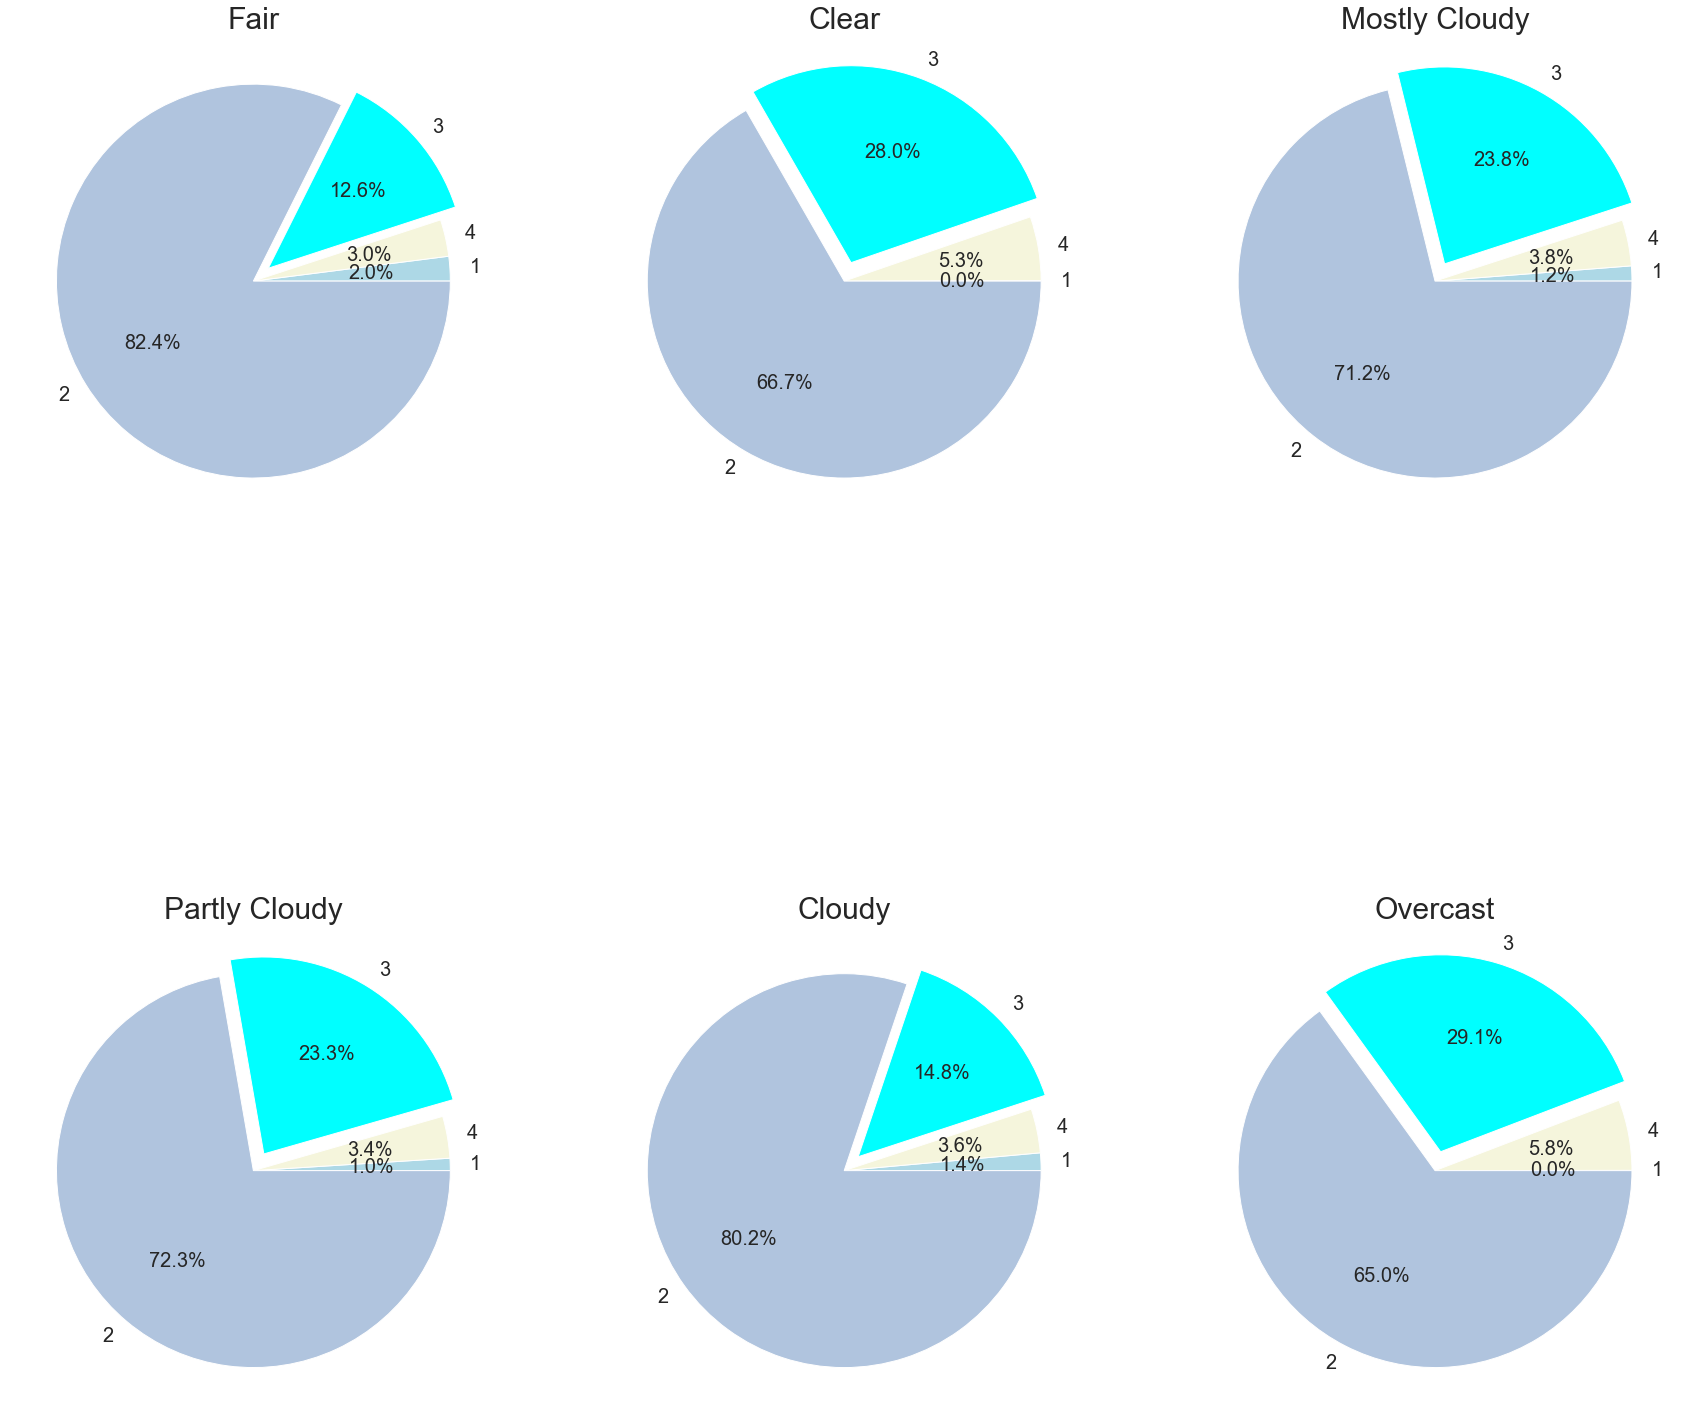

In [14]:
plt.figure(figsize = (30,30))
colors = ('lightblue', "beige", "cyan", 'lightsteelblue')
explode = (0, 0, 0.1, 0)

# Fair weather
plt.subplot(2,3,1)
weather_severity.loc["Fair"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors =colors, explode = explode)
plt.title("Fair", fontsize = 30)
plt.ylabel("")

# Clear weather
plt.subplot(2,3,2)
weather_severity.loc["Clear"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Clear", fontsize = 30)
plt.ylabel("")

# Mosty cloudy weather
plt.subplot(2,3,3)
weather_severity.loc["Mostly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Mostly Cloudy", fontsize = 30)
plt.ylabel("")

#PArtly cloudy weather
plt.subplot(2,3,4)
weather_severity.loc["Partly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Partly Cloudy", fontsize = 30)
plt.ylabel("")

# Cloudy weather
plt.subplot(2,3,5)
weather_severity.loc["Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Cloudy", fontsize = 30)
plt.ylabel("")

# Overcast weather
plt.subplot(2,3,6)
weather_severity.loc["Overcast"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Overcast", fontsize = 30)
plt.ylabel("")

- It seems all six Weather Conditions has most accidents happened in Severity 2 i.e above 65%. Clear and Overcast Weather had no Severity 1 accidents.

In [55]:
group1 = df.groupby(["Weather_Condition", "Year"])["Year"].count().sort_values(ascending = False).unstack("Weather_Condition")

In [56]:
weather_year = group1[["Fair","Clear", "Mostly Cloudy", "Partly Cloudy", "Cloudy", "Overcast"]].unstack()

Text(0, 0.5, '')

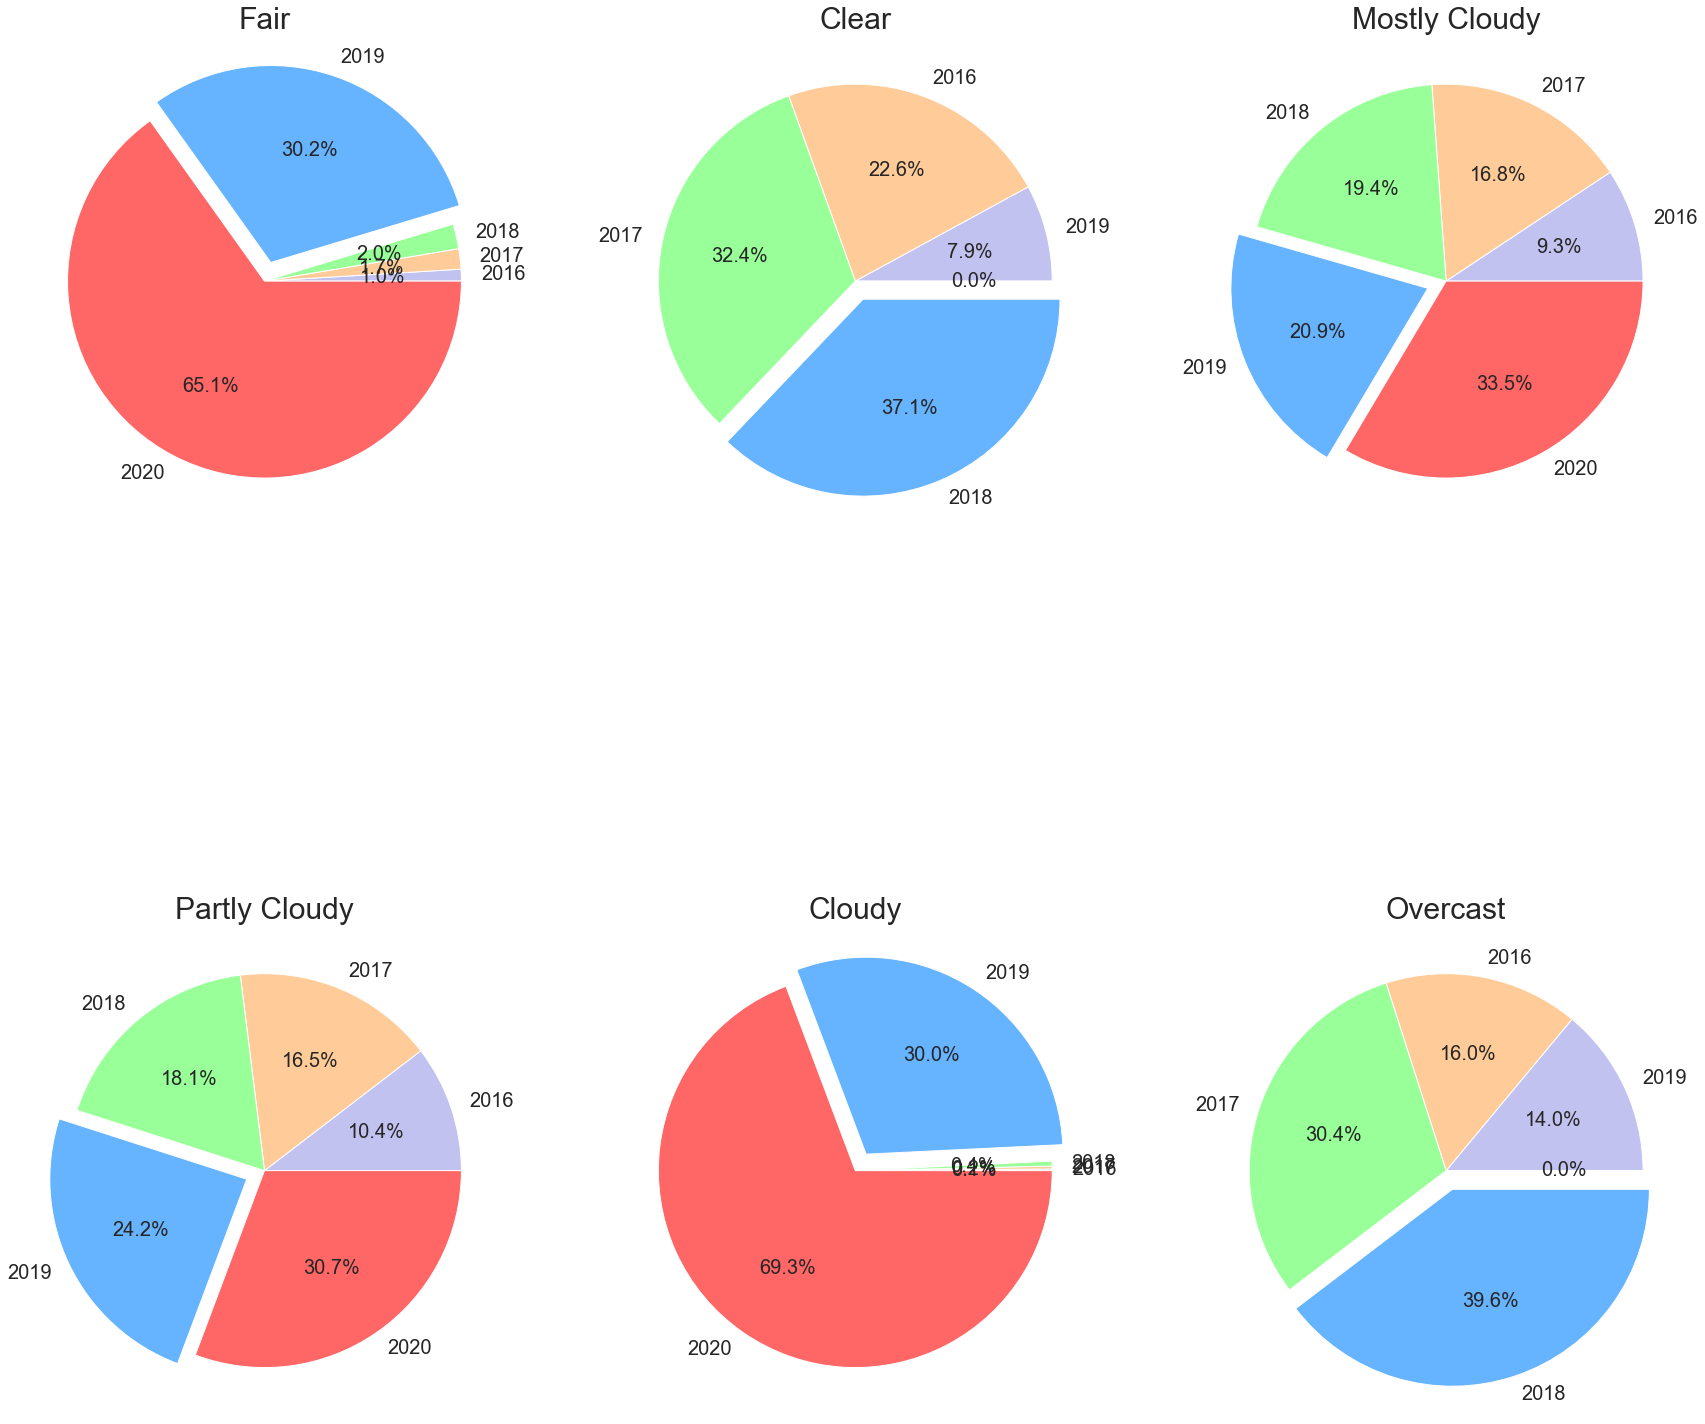

In [65]:
plt.figure(figsize = (30,30))
explode = (0,0, 0, 0.1, 0)
colors = ['#c2c2f0', '#ffcc99', '#99ff99', '#66b3ff','#ff6666']

plt.subplot(2,3,1)
weather_year.loc["Fair"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Fair", fontsize = 30)
plt.ylabel("")

plt.subplot(2,3,2)
weather_year.loc["Clear"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Clear", fontsize = 30)
plt.ylabel("")

plt.subplot(2,3,3)
weather_year.loc["Mostly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Mostly Cloudy", fontsize = 30)
plt.ylabel("")

plt.subplot(2,3,4)
weather_year.loc["Partly Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Partly Cloudy", fontsize = 30)
plt.ylabel("")

plt.subplot(2,3,5)
weather_year.loc["Cloudy"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Cloudy", fontsize = 30)
plt.ylabel("")

plt.subplot(2,3,6)
weather_year.loc["Overcast"].sort_values().plot(kind = "pie",autopct = "%1.1f%%", textprops={'fontsize': 20}, colors = colors, explode = explode)
plt.title("Overcast", fontsize = 30)
plt.ylabel("")

- Overcast and Clear weather has no accident records for 2020. This could be an error while collecting data since 2020 recorded most accidents overall. Fair and Cloudy weather conditions had more than 65% accidents happen in 2020.